<a href="https://colab.research.google.com/github/thieuhy/techequityai/blob/main/techequityai/Project/Robotics_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, auth
from googleapiclient.discovery import build
import pandas as pd
import io

# Step 1: Authenticate and mount drive
print("Authenticating with Google Drive...")
auth.authenticate_user()
drive.mount('/content/drive')

# Step 2: Build Drive API service
drive_service = build('drive', 'v3')
print("Drive API service ready!")

# Step 3: Functions to access shared data
def find_shared_folder(folder_name):
    """Find shared folder by name"""
    query = f"name='{folder_name}' and mimeType='application/vnd.google-apps.folder'"
    results = drive_service.files().list(q=query, fields="files(id, name, owners)").execute()
    folders = results.get('files', [])

    if folders:
        folder = folders[0]
        print(f"Found folder: {folder['name']} (ID: {folder['id']})")
        return folder['id']
    else:
        print(f"Folder '{folder_name}' not found")
        return None

def list_folder_files(folder_id):
    """List all files in folder"""
    query = f"'{folder_id}' in parents"
    results = drive_service.files().list(q=query, fields="files(id, name, mimeType, size)").execute()
    files = results.get('files', [])

    print("\nFiles in shared folder:")
    data_files = []
    for i, file in enumerate(files, 1):
        size_mb = round(int(file.get('size', 0)) / (1024*1024), 2) if file.get('size') else 'Unknown'
        print(f"{i}. {file['name']} ({size_mb} MB)")

        if any(file['name'].endswith(ext) for ext in ['.csv', '.xlsx', '.xls', '.json']):
            data_files.append(file)

    return data_files

def load_file(file_id, file_name):
    """Download and load data file"""
    print(f"Loading {file_name}...")

    try:
        request = drive_service.files().get_media(fileId=file_id)
        file_content = request.execute()

        if file_name.endswith('.csv'):
            df = pd.read_csv(io.BytesIO(file_content))
        elif file_name.endswith(('.xlsx', '.xls')):
            df = pd.read_excel(io.BytesIO(file_content))
        elif file_name.endswith('.json'):
            df = pd.read_json(io.BytesIO(file_content))
        else:
            print(f"Unsupported file type: {file_name}")
            return None

        print(f"Successfully loaded: {df.shape[0]} rows, {df.shape[1]} columns")
        print(f"Columns: {list(df.columns)}")
        return df

    except Exception as e:
        print(f"Error loading {file_name}: {e}")
        return None

def peek_data(df, rows=5):
    """Quick look at data"""
    if df is not None:
        print(f"\nFirst {rows} rows:")
        print(df.head(rows))
        print(f"\nData info:")
        print(df.info())

# Step 4: Main function to access shared project
def access_project_data(folder_name):
    """Main function to access shared project folder"""

    print(f"Looking for shared folder: '{folder_name}'")
    folder_id = find_shared_folder(folder_name)

    if not folder_id:
        print("Folder not found. Make sure:")
        print("1. The folder is shared with you")
        print("2. You have the correct folder name")
        return None, []

    data_files = list_folder_files(folder_id)

    if not data_files:
        print("No data files found in folder")
        return folder_id, []

    print(f"\nFound {len(data_files)} data files")
    return folder_id, data_files

# Step 5: Easy-to-use wrapper
def load_project_file(folder_name, file_name=None):
    """Load specific file from project folder"""

    folder_id, data_files = access_project_data(folder_name)

    if not data_files:
        return None

    if file_name:
        # Load specific file
        target_file = None
        for file in data_files:
            if file['name'] == file_name:
                target_file = file
                break

        if target_file:
            return load_file(target_file['id'], target_file['name'])
        else:
            print(f"File '{file_name}' not found")
            return None
    else:
        # Load first data file
        first_file = data_files[0]
        print(f"Loading first data file: {first_file['name']}")
        return load_file(first_file['id'], first_file['name'])

Authenticating with Google Drive...
Mounted at /content/drive
Drive API service ready!


In [ ]:
SHARED_FOLDER_NAME = 'TechEquity_DATABASE'

# Example 1: Browse shared folder
print("="*50)
print("BROWSING SHARED FOLDER")
print("="*50)
folder_id, files = access_project_data(SHARED_FOLDER_NAME)

BROWSING SHARED FOLDER
Looking for shared folder: 'TechEquity_DATABASE'
Found folder: TechEquity_DATABASE (ID: 1Y_LzIa1rJcpc-R6tovVmwoXiHh0-LUlK)

Files in shared folder:
1. AI_in_Consumer_Industries_funding.csv (0.15 MB)
2. drones-companies-us-215records.csv (0.09 MB)
3. robotic-california.csv (0.49 MB)
4. dronescompaniesnonca.csv (0.32 MB)
5. dronescompaniesca.csv (0.11 MB)
6. healthcare-and-biotech-in-bay-area.csv (0.01 MB)
7. ai-in-transportation.csv (0.38 MB)

Found 7 data files


In [ ]:
# Example 2: Load specific file (uncomment and modify)
df = load_project_file(SHARED_FOLDER_NAME, 'robotic-california.csv')
peek_data(df)

Looking for shared folder: 'TechEquity_DATABASE'
Found folder: TechEquity_DATABASE (ID: 1Y_LzIa1rJcpc-R6tovVmwoXiHh0-LUlK)

Files in shared folder:
1. AI_in_Consumer_Industries_funding.csv (0.15 MB)
2. drones-companies-us-215records.csv (0.09 MB)
3. robotic-california.csv (0.49 MB)
4. dronescompaniesnonca.csv (0.32 MB)
5. dronescompaniesca.csv (0.11 MB)
6. healthcare-and-biotech-in-bay-area.csv (0.01 MB)
7. ai-in-transportation.csv (0.38 MB)

Found 7 data files
Loading robotic-california.csv...
Successfully loaded: 1255 rows, 21 columns
Columns: ['Organization Name', 'Organization Name URL', 'IPO Status', 'Last Funding Type', 'Operating Status', 'Headquarters Location', 'Industries', 'CB Rank (Organization)', 'Stage', 'CB Rank (Company)', 'LinkedIn', 'Website', 'Description', 'Last Funding Amount', 'Last Funding Amount Currency', 'Last Funding Amount (in USD)', 'Funding Status', 'Last Funding Date', 'Total Funding Amount', 'Total Funding Amount Currency', 'Total Funding Amount (in USD)

In [ ]:
# Step 1: Clean and filter the relevant columns
df_total_funding = df[["Organization Name", "Total Funding Amount (in USD)"]].dropna()
df_total_funding["Total Funding Amount (in USD)"] = pd.to_numeric(df_total_funding["Total Funding Amount (in USD)"], errors="coerce")

# Step 2: Get the top 10 companies by total funding amount
top_10_total_funding = df_total_funding.sort_values(by="Total Funding Amount (in USD)", ascending=False).head(10)

# Step 3: Display the top 10 companies
print("Top 10 Companies by Total Funding Amount:")
display(top_10_total_funding)

Top 10 Companies by Total Funding Amount:


,Organization Name,Total Funding Amount (in USD)
730,Nuro,2.238149e+09
706,Neuralink,1.336242e+09
98,Automation Anywhere,1.052700e+09
1002,Zoox,1.005000e+09
1000,Zymergen,9.741400e+08
382,Figure,8.540000e+08
1007,Zipline,8.210000e+08
831,PROCEPT BioRobotics,8.203352e+08
1252,Skydio,7.400000e+08
922,Rokid,6.438863e+08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

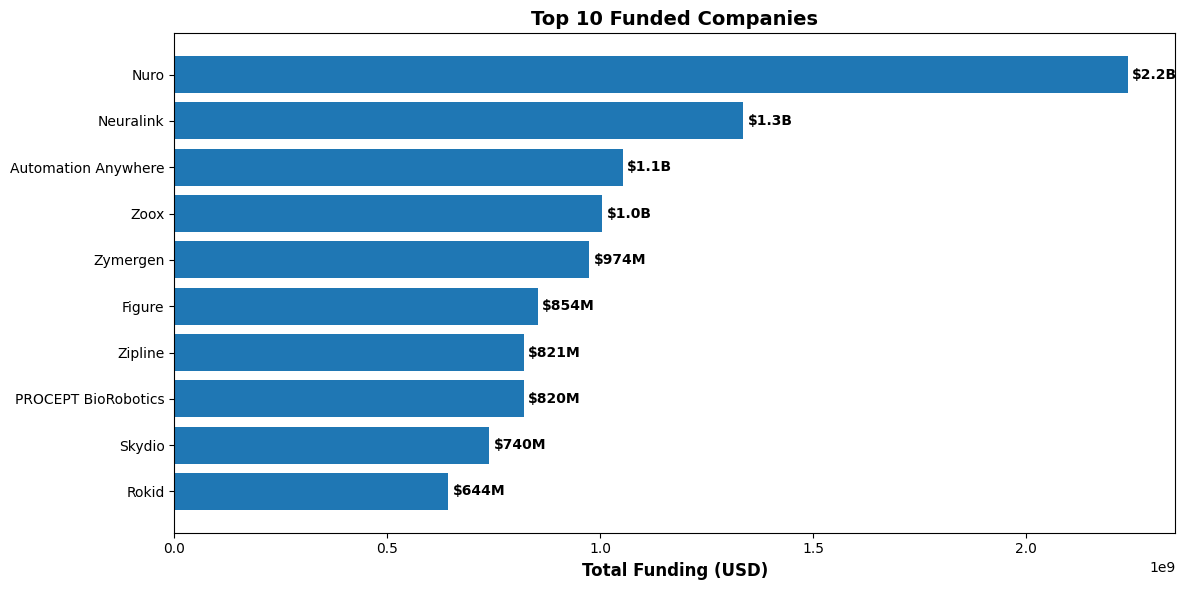

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to abbreviate large numbers (e.g., 2.3B, 750M)
def abbreviate_number(x):
    if x >= 1_000_000_000:
        return f"${x / 1_000_000_000:.1f}B"
    elif x >= 1_000_000:
        return f"${x / 1_000_000:.0f}M"
    else:
        return f"${x:,.0f}"

# Step 1: Clean and filter the relevant columns
df_total_funding = df[["Organization Name", "Total Funding Amount (in USD)"]].dropna()
df_total_funding["Total Funding Amount (in USD)"] = pd.to_numeric(df_total_funding["Total Funding Amount (in USD)"], errors="coerce")

# Step 2: Get the top 10 companies by total funding amount
top_10_total_funding = df_total_funding.sort_values(by="Total Funding Amount (in USD)", ascending=False).head(10)

# Step 3: Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_total_funding["Organization Name"], top_10_total_funding["Total Funding Amount (in USD)"])
plt.xlabel("Total Funding (USD)", fontweight="bold", fontsize=12)
plt.title("Top 10 Funded Companies", fontweight="bold", fontsize=14)
plt.gca().invert_yaxis()  # Show the largest on top

# Step 4: Add labels
for bar in bars:
    width = bar.get_width()
    label = abbreviate_number(width)
    plt.text(
        width + 1e7,
        bar.get_y() + bar.get_height() / 2,
        label,
        va="center",
        fontsize=10,
        fontweight="bold" # Make it bold!
    )

plt.tight_layout()
from google.colab import files
plt.savefig("plot.svg", format="svg")
files.download("plot.svg")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

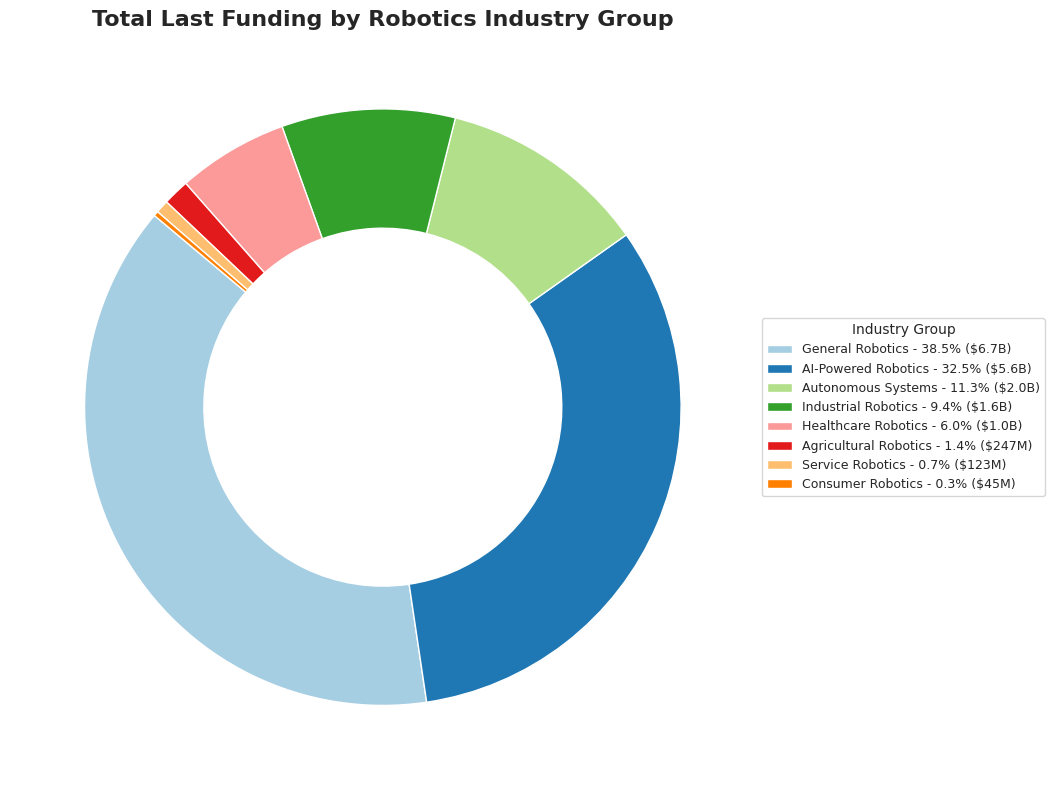

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean and explode industries for robotics
robotics_df = df[['Industries', 'Last Funding Amount (in USD)']].dropna()
robotics_df['Industries'] = robotics_df['Industries'].str.split(',')
robotics_df = robotics_df.explode('Industries')
robotics_df['Industries'] = robotics_df['Industries'].str.strip()

# Step 2: Define robotics-focused group mapping
robotics_group_map = {
    'Robotics': 'General Robotics',
    'Industrial Automation': 'Industrial Robotics',
    'Manufacturing': 'Industrial Robotics',
    'Medical Device': 'Healthcare Robotics',
    'Health Care': 'Healthcare Robotics',
    'Surgical Robotics': 'Healthcare Robotics',
    'Artificial Intelligence (AI)': 'AI-Powered Robotics',
    'Machine Learning': 'AI-Powered Robotics',
    'Autonomous Vehicles': 'Autonomous Systems',
    'Drones': 'Autonomous Systems',
    'Aerospace': 'Autonomous Systems',
    'Agriculture': 'Agricultural Robotics',
    'AgTech': 'Agricultural Robotics',
    'Food and Beverage': 'Service Robotics',
    'Consumer Electronics': 'Consumer Robotics',
    'Retail': 'Consumer Robotics'
}

# Step 3: Map industries to grouped category
robotics_df['Group'] = robotics_df['Industries'].map(robotics_group_map)
robotics_grouped = robotics_df.dropna(subset=['Group'])

# Step 4: Aggregate total funding by group
funding_by_group = (
    robotics_grouped.groupby('Group')['Last Funding Amount (in USD)']
    .sum()
    .sort_values(ascending=False)
)

# Step 5: Pie chart with % and $ labels
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Paired(range(len(funding_by_group)))

wedges, texts = ax.pie(
    funding_by_group.values,
    labels=None,  # no labels directly on wedges
    colors=colors,
    startangle=140,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black", fontsize=10)
)

# Add legend with labels + formatted dollar values
total = funding_by_group.values.sum()
legend_labels = [
    f"{group} - {value / total:.1%} (${value / 1e9:.1f}B)" if value >= 1e9 else f"{group} - {value / total:.1%} (${value / 1e6:.0f}M)"
    for group, value in zip(funding_by_group.index, funding_by_group.values)
]

ax.legend(wedges, legend_labels, title="Industry Group", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9, title_fontsize=10)

ax.set_title('Total Last Funding by Robotics Industry Group', fontsize=16, fontweight='bold')
plt.tight_layout()
from google.colab import files
plt.savefig("plot.svg", format="svg")
files.download("plot.svg")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

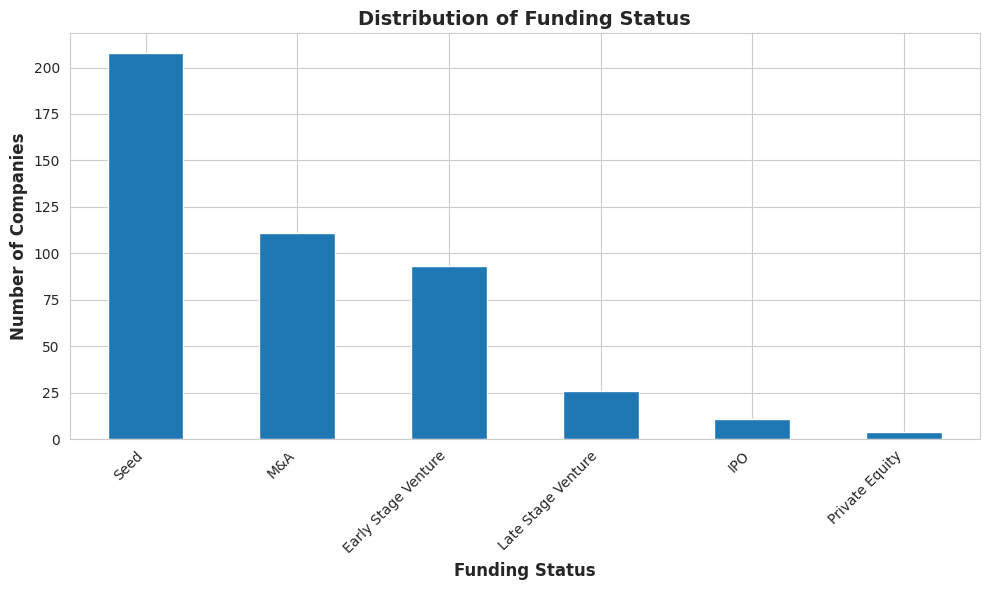

In [ ]:
import matplotlib.pyplot as plt

# Step 1:Count the occurrences of each funding status
funding_status_counts = df['Funding Status'].value_counts().dropna()

# Step 2: Plotting the bar chart
plt.figure(figsize=(10, 6))
funding_status_counts.plot(kind='bar')
plt.xlabel("Funding Status", fontweight="bold", fontsize=12)
plt.ylabel("Number of Companies", fontweight="bold", fontsize=12)
plt.title("Distribution of Funding Status", fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
from google.colab import files
plt.savefig("plot.svg", format="svg")
files.download("plot.svg")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

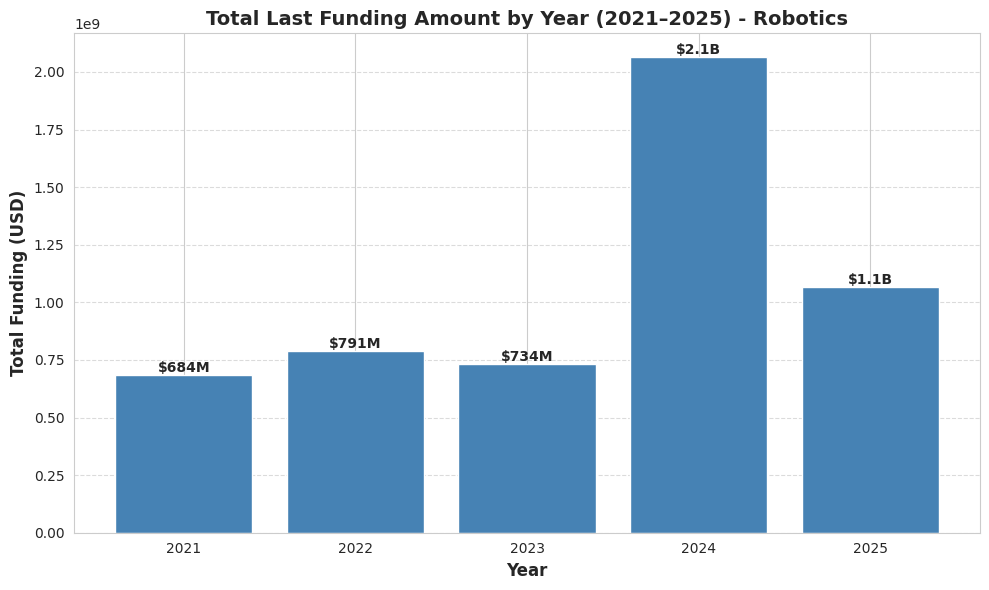

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn whitegrid style
sns.set_style("whitegrid")

# Step 1: Filter robotics-related rows with valid funding and date
robotics_df = df[df['Industries'].str.contains("Robotics", na=False)]
robotics_df = robotics_df[['Last Funding Date', 'Last Funding Amount (in USD)']].dropna()
robotics_df['Last Funding Date'] = pd.to_datetime(robotics_df['Last Funding Date'], errors='coerce')
robotics_df['Funding Year'] = robotics_df['Last Funding Date'].dt.year

# Step 2: Filter for 2021–2025
robotics_filtered = robotics_df[robotics_df['Funding Year'].between(2021, 2025)]

# Step 3: Aggregate funding
funding_by_year = robotics_filtered.groupby('Funding Year')['Last Funding Amount (in USD)'].sum().sort_index()

# Step 4: Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(funding_by_year.index, funding_by_year.values, color='steelblue')

# Titles and labels
ax.set_title('Total Last Funding Amount by Year (2021–2025) - Robotics', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Funding (USD)', fontsize=12, fontweight='bold')

# Format value tags (e.g., $2.8B)
for bar in bars:
    height = bar.get_height()
    label = f"${height/1e9:.1f}B" if height >= 1e9 else f"${height/1e6:.0f}M"
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            label, ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(funding_by_year.index)
ax.set_xticklabels([str(year) for year in funding_by_year.index])

plt.tight_layout()
from google.colab import files
plt.savefig("plot.svg", format="svg")
files.download("plot.svg")
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Extract city name from "Headquarters Location"
df['City'] = df['Headquarters Location'].str.extract(r'^(.*?), California')

# Count companies by city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Company Count']

# Sort by company count for better visualization
city_counts_sorted = city_counts.sort_values('Company Count', ascending=False)

# Get top 10 cities
top_10_locations = city_counts_sorted.head(10)

# Create interactive horizontal bar chart for top 10 cities
fig = px.bar(
    top_10_locations,
    x='Company Count',
    y='City',
    orientation='h',
    color='Company Count', # Color the bars by count
    color_continuous_scale='Blues', # Color scale
    title='Top 10 Company Headquarters Count by City in California'
)

fig.update_layout(title_x=0.5, height=len(top_10_locations) * 40) # Adjust height based on number of cities
fig.update_layout(yaxis=dict(autorange="reversed"))
from google.colab import files
plt.savefig("plot.svg", format="svg")
files.download("plot.svg")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import plotly.express as px

# Extract city name from "Headquarters Location"
df['City'] = df['Headquarters Location'].str.extract(r'^(.*?), California')

# Count companies by city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Company Count']

# Manually defined lat/lon for major CA cities
city_coords = {
    'San Francisco': (37.7749, -122.4194),
    'Los Angeles': (34.0522, -118.2437),
    'San Diego': (32.7157, -117.1611),
    'San Jose': (37.3382, -121.8863),
    'Oakland': (37.8044, -122.2712),
    'Sacramento': (38.5816, -121.4944),
    'Long Beach': (33.7701, -118.1937),
    'Fresno': (36.7378, -119.7871),
    'Anaheim': (33.8353, -117.9174),
    'Santa Ana': (33.7455, -117.8677),
    'Sunnyvale': (37.3688, -122.0363),
    'Palo Alto': (37.4419, -122.1430),
    'Santa Clara': (37.3541, -121.9690),
    'Irvine': (33.6846, -117.8265),
    'Pasadena': (34.1478, -118.1445),
    'Mountain View': (37.3861, -122.0839),
    'Redwood City': (37.4852, -122.2364),
    'Berkeley': (37.8716, -122.2727),
    'Menlo Park': (37.45296, -122.18173),
    'San Mateo': (37.5630, -122.3255)
    # Add more if needed
}

# Merge coordinates into city_counts
city_counts['Latitude'] = city_counts['City'].map(lambda x: city_coords.get(x, (None, None))[0])
city_counts['Longitude'] = city_counts['City'].map(lambda x: city_coords.get(x, (None, None))[1])

# Filter only matched cities with known coordinates
map_df = city_counts.dropna(subset=['Latitude', 'Longitude'])

# Create interactive map
fig = px.scatter_mapbox(
    map_df,
    lat='Latitude',
    lon='Longitude',
    size='Company Count',
    color='Company Count',
    hover_name='City',
    hover_data={'Company Count': True},
    color_continuous_scale='Blues',
    zoom=5.5,
    title='Robotics Companies by City in California'
)

fig.update_layout(
    mapbox_style="open-street-map",
    title_x=0.5,
    height=600,
    margin={"r":0, "t":50, "l":0, "b":0}
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Filter for California and extract city, keeping funding amount
df_california_funding = df[['Headquarters Location', 'Total Funding Amount (in USD)']].dropna()
df_california_funding = df_california_funding[df_california_funding['Headquarters Location'].str.contains('California', na=False)]

# Extract City from location
df_california_funding['City'] = df_california_funding['Headquarters Location'].str.extract(r'^(.*?), California')

# Step 2: Aggregate total funding by city
city_funding = (
    df_california_funding.groupby('City')['Total Funding Amount (in USD)']
    .sum().reset_index() # Use reset_index to get City as a column
)

# Add a column for funding in Millions USD for better display
city_funding['Funding (M USD)'] = city_funding['Total Funding Amount (in USD)'] / 1e6

# Step 3: Sort by funding amount for better visualization and get top 10
city_funding_sorted = city_funding.sort_values('Funding (M USD)', ascending=False)
top_10_cities_funding = city_funding_sorted.head(10)


# Step 4: Plot interactive horizontal bar chart
fig = px.bar(
    top_10_cities_funding,
    x='Funding (M USD)',
    y='City',
    orientation='h',
    color='Funding (M USD)',
    color_continuous_scale='Blues',
    title='Top 10 Total Funding Amount by City in California (Millions USD)'
)

fig.update_layout(title_x=0.5, height=len(top_10_cities_funding) * 40) # Adjust height based on number of cities
fig.update_layout(yaxis=dict(autorange="reversed"))
from google.colab import files
plt.savefig("plot.svg", format="svg")
files.download("plot.svg")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

Data loaded: 1255 total companies


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

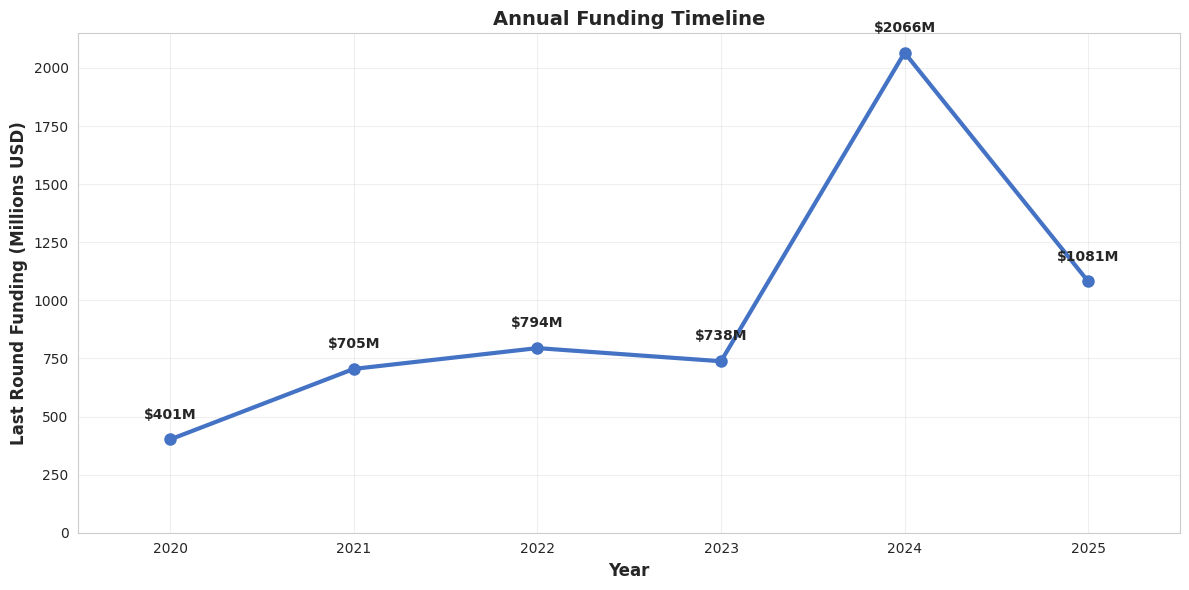

Timeline covers 2020 to 2025
Peak funding year: 2024 with $2066M
Annual Funding Timeline (2020-2025) created successfully!


In [ ]:
# Clean funding data
df['Last_Funding_USD'] = pd.to_numeric(df['Last Funding Amount (in USD)'], errors='coerce')

print(f"Data loaded: {len(df)} total companies")

# Parse funding dates and create timeline
if 'Last Funding Date' in df.columns:
    df['Funding_Date'] = pd.to_datetime(df['Last Funding Date'], errors='coerce')
    timeline_df = df.dropna(subset=['Funding_Date', 'Last_Funding_USD'])
    timeline_df = timeline_df[timeline_df['Last_Funding_USD'] > 0]

    if len(timeline_df) > 5:  # Only create timeline if we have enough data
        timeline_df['Year'] = timeline_df['Funding_Date'].dt.year

        # Filter for years 2020-2025 only
        timeline_df = timeline_df[(timeline_df['Year'] >= 2020) & (timeline_df['Year'] <= 2025)]

        if len(timeline_df) > 0:
            yearly_funding = timeline_df.groupby('Year')['Last_Funding_USD'].sum() / 1e6

            plt.figure(figsize=(12, 6))
            plt.plot(yearly_funding.index, yearly_funding.values, 'o-', color='#4472C4',
                    linewidth=3, markersize=8)
            plt.xlabel('Year', fontweight='bold', fontsize=12)
            plt.ylabel('Last Round Funding (Millions USD)', fontweight='bold', fontsize=12)
            plt.title('Annual Funding Timeline', fontweight='bold', fontsize=14)
            plt.grid(True, alpha=0.3)

            # Add value labels on data points
            for x, y in zip(yearly_funding.index, yearly_funding.values):
                plt.annotate(f'${y:.0f}M', (x, y), textcoords="offset points",
                            xytext=(0,15), ha='center', fontweight='bold', fontsize=10)

            # Set x-axis to show only 2020-2025
            plt.xlim(2019.5, 2025.5)
            plt.xticks(range(2020, 2026))

            # Set y-axis to start from 0 for better visualization
            plt.ylim(bottom=0)

            plt.tight_layout()
            from google.colab import files
            plt.savefig("plot.svg", format="svg")
            files.download("plot.svg")
            plt.show()

            print(f"Timeline covers {yearly_funding.index.min()} to {yearly_funding.index.max()}")
            print(f"Peak funding year: {yearly_funding.idxmax()} with ${yearly_funding.max():.0f}M")
            print("Annual Funding Timeline (2020-2025) created successfully!")
        else:
            print("No funding data found for years 2020-2025")

    else:
        print("Insufficient timeline data for meaningful analysis")
else:
    print("No funding date column found in the data")